Plot $\eta_0$ for various values of $L$ with constant $L/p$.

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.integrate import quad

from punct_utils import nu

plt.style.use('default')
plt.rcParams["text.usetex"] = True

In [2]:
n = 2000
beta = 1
z = -1+1j
setting = "$L/p = {} \quad z = {}$".format(beta, z)

In [3]:
def eta0_tr(p, n, L, z, start=0., eps=1e-5):
    eigvals_circ = nu(L, 2*np.pi*np.arange(n)/n)
    func = lambda e0: np.mean(eigvals_circ**2/(eigvals_circ-p*(z-1+e0)))
    eta0p, eta0m = func(start), start
    while np.abs(eta0p-eta0m) > eps:
        eta0p, eta0m = func(eta0p), eta0p
    return eta0p

def eta0_int(p, L, z, start=0., eps=1e-5, limit=500):
    integ = lambda x, e0: nu(L, x)**2/(nu(L, x)-p*(z-1+e0))
    func_r = lambda e0: quad(lambda x: integ(x, e0).real, 0, 2*np.pi, limit=limit)[0]
    func_i = lambda e0: quad(lambda x: integ(x, e0).imag, 0, 2*np.pi, limit=limit)[0]
    func = lambda e0: (func_r(e0)+1j*func_i(e0))/(2*np.pi)
    eta0p, eta0m = func(start), start
    while np.abs(eta0p-eta0m) > eps:
        eta0p, eta0m = func(eta0p), eta0p
    return eta0p

In [4]:
Ls = np.linspace(1, 100, 10, dtype=int)

In [5]:
eta0_tr_vals = np.zeros(len(Ls), dtype='complex')
eta0_int_vals = np.zeros(len(Ls), dtype='complex')
for i, L in enumerate(tqdm(Ls)):
    p = int(L/beta)
    eta0_tr_vals[i] = eta0_tr(p, n, L, z, start=eta0_tr_vals[i-1])
    eta0_int_vals[i] = eta0_int(p, L, z, start=eta0_int_vals[i-1])

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:17<00:00,  1.80s/it]


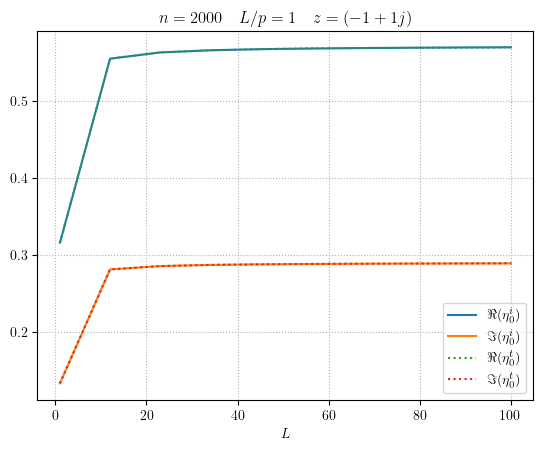

In [6]:
plt.plot(Ls, eta0_int_vals.real, label="$\Re(\eta_0^i)$")
plt.plot(Ls, eta0_int_vals.imag, label="$\Im(\eta_0^i)$")
plt.plot(Ls, eta0_tr_vals.real, ls=':', label="$\Re(\eta_0^t)$")
plt.plot(Ls, eta0_tr_vals.imag, ls=':', label="$\Im(\eta_0^t)$")
plt.grid(ls=':')
plt.xlabel("$L$")
plt.legend()
plt.title("$n = {} \quad$".format(n)+setting)
plt.show()

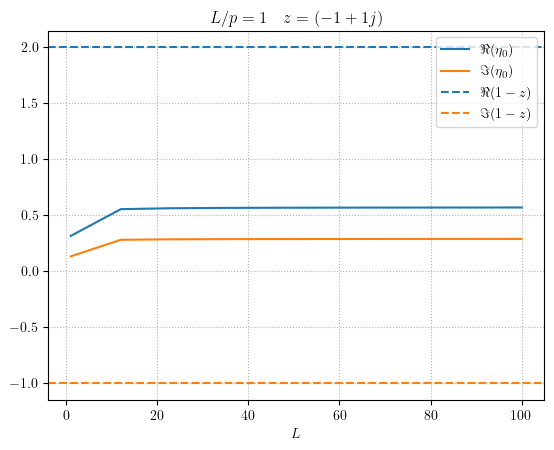

In [7]:
plt.plot(Ls, eta0_int_vals.real, color='C0', label="$\Re(\eta_0)$")
plt.plot(Ls, eta0_int_vals.imag, color='C1', label="$\Im(\eta_0)$")
plt.axhline(y=(1-z).real, ls='--', color='C0', label="$\Re(1-z)$")
plt.axhline(y=(1-z).imag, ls='--', color='C1', label="$\Im(1-z)$")
plt.grid(ls=':')
plt.xlabel("$L$")
plt.legend()
plt.title(setting)
plt.show()